# Homework 9

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display
# Global PCA Instance
twoCompPCA = PCA(n_components=2)

## Question 10.5

In [2]:
# Import data
wineData = pd.read_csv("wine/wine.data",\
    names=['Type', "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", " Magnesium", 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
wineData.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


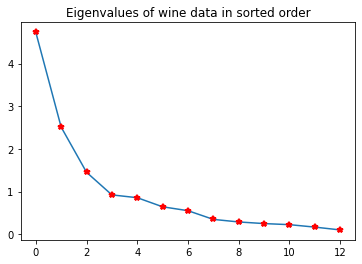

In [4]:
# Get the type-excluded data
wineMatrixCore = wineData.iloc[:, 1:].to_numpy()
wineMatrixCoreScaled = StandardScaler().fit_transform(wineMatrixCore)
wineCovmat = np.cov(wineMatrixCoreScaled.T)
# Get eigenvalues and eigenvectors ...
# ... and sort them in index order
wineEigenValue, wineEigenVector = np.linalg.eig(wineCovmat)
wineIndex = np.argsort(wineEigenValue)[::-1]
wineEigenValue = wineEigenValue[wineIndex]
wineEigenVector = wineEigenVector[:, wineIndex]
# Plot the data
plt.figure(); plt.plot(wineEigenValue, label="Eigenvalues", marker="*", mec="red", mew="2.0"); plt.title('Eigenvalues of wine data in sorted order'); plt.show()

,Principle Component 1,Principle Component 2,Type
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1
...,...,...,...
173,-3.370524,-2.216289,3
174,-2.601956,-1.757229,3
175,-2.677839,-2.760899,3
176,-2.387017,-2.297347,3


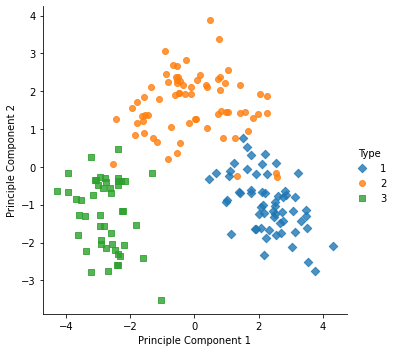

In [5]:
winePrincipleComponent = twoCompPCA.fit_transform(wineMatrixCoreScaled)
wineDataPCA = pd.concat([ \
        pd.DataFrame(data=winePrincipleComponent,columns=['Principle Component 1', 'Principle Component 2']),\
        wineData['Type']], axis=1)
display(wineDataPCA)
sns.lmplot('Principle Component 1', 'Principle Component 2', data=wineDataPCA, fit_reg=False, hue="Type", markers=['D','o','s'])

In [6]:
seedsData = pd.read_csv("seeds/seeds_dataset.txt", \
    names=['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'Type'], dtype=np.float32)
seedsDataCore = seedsData.iloc[:, :-1]
seedsDataCore.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.260000,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.880000,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.290000,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.840000,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.139999,14.99,0.9034,5.658,3.562,1.355,5.175


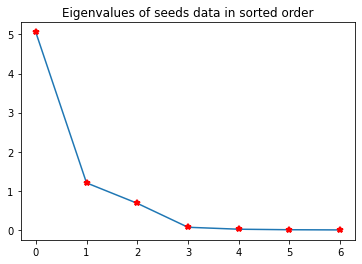

In [8]:
seedsMatrixCoreScaled = StandardScaler().fit_transform(seedsDataCore.to_numpy())
seedsCovmat = np.cov(seedsMatrixCoreScaled.T)
seedsEigenValue, seedsEigenVector = np.linalg.eig(seedsCovmat)
seedsIndex = np.argsort(seedsEigenValue)[::-1]
seedsEigenValue = seedsEigenValue[seedsIndex]
seedsEigenVector = seedsEigenVector[:, seedsIndex]
plt.figure(); plt.plot(seedsEigenValue, label="Eigenvalues", marker="*", mec="red", mew="2.0"); plt.title('Eigenvalues of seeds data in sorted order'); plt.show()

,Principle Component 1,Principle Component 2,Type
0,0.317054,0.783669,1.0
1,-0.003387,1.913214,1.0
2,-0.459445,1.907226,1.0
3,-0.591937,1.931070,1.0
4,1.102909,2.068091,1.0
...,...,...,...
205,-1.991108,0.865956,3.0
206,-2.726865,-0.208189,3.0
207,-1.403632,-1.298593,3.0
208,-2.339328,0.099699,3.0


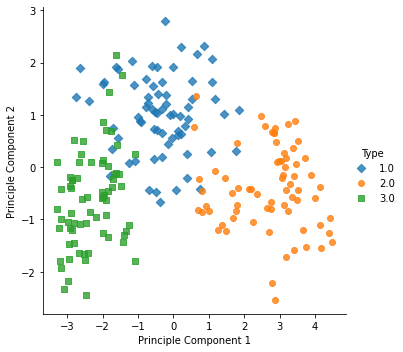

In [9]:
seedsPrincipleComponent = twoCompPCA.fit_transform(seedsMatrixCoreScaled)
seedsDataPCA = pd.concat([ \
        pd.DataFrame(data=seedsPrincipleComponent,columns=['Principle Component 1', 'Principle Component 2']),\
        seedsData['Type']], axis=1)
display(seedsDataPCA)
sns.lmplot('Principle Component 1', 'Principle Component 2', data=seedsDataPCA, fit_reg=False, hue="Type", markers=['D','o','s'])